In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/05.%20Week%205/Datasets/netflix_titles.csv'
df = pd.read_csv(url)
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [4]:
# Info awal
print("📋 Informasi Umum Dataset:")
print(df.info())
print("\n📌 Jumlah Missing Values Tiap Kolom:")
print(df.isnull().sum())

📋 Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

📌 Jumlah Missing Values Tiap Kolom:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating          

/tmp/ipython-input-6-578922536.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


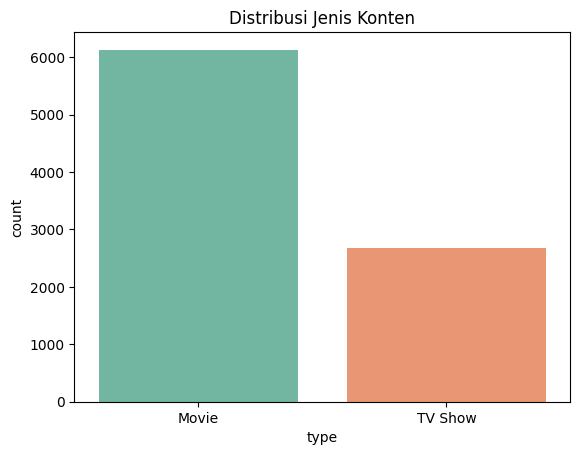

In [6]:
# Mengubah 'date_added' ke format datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Membuat fitur baru dari date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Total Movie vs TV Show
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribusi Jenis Konten")
plt.show()

/tmp/ipython-input-7-2416714686.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


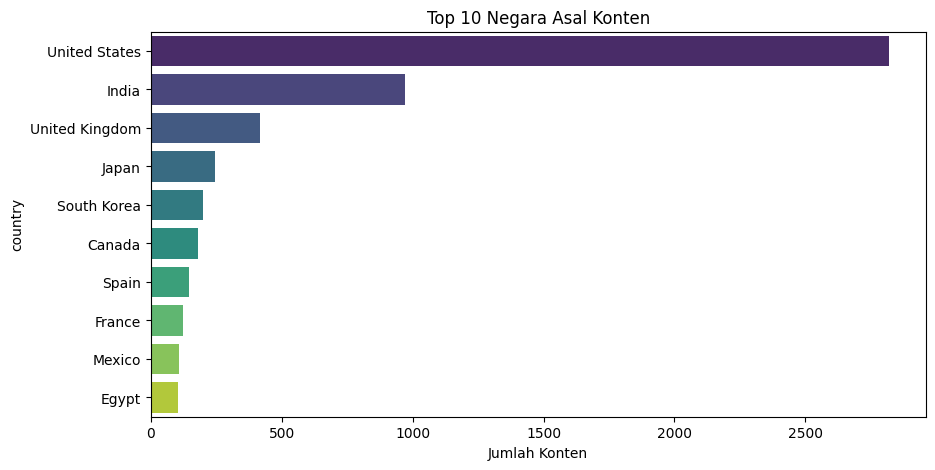

In [7]:

# Negara paling sering muncul
plt.figure(figsize=(10,5))
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Negara Asal Konten")
plt.xlabel("Jumlah Konten")
plt.show()

/tmp/ipython-input-8-848377155.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='mako')


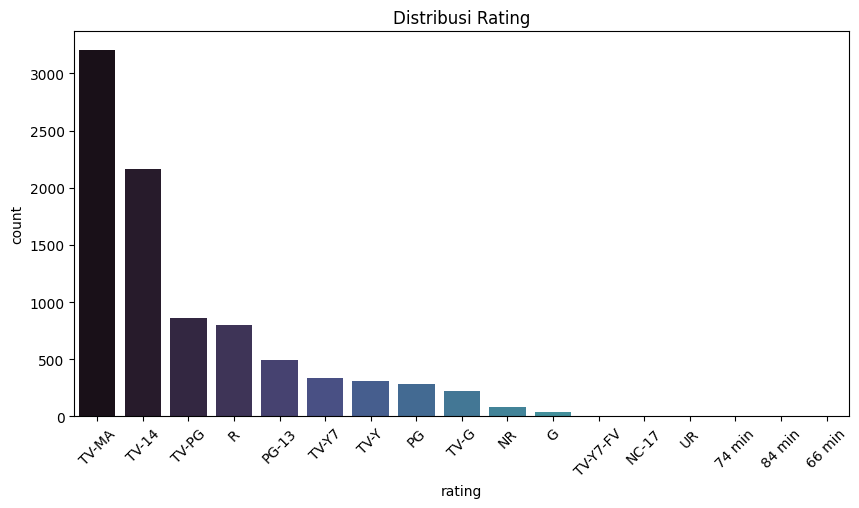

In [8]:

# Rating terbanyak
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='mako')
plt.title("Distribusi Rating")
plt.xticks(rotation=45)
plt.show()

### Penjelasan Konsep Statistik

#### 1. Frekuensi / Count
Menghitung jumlah kemunculan suatu kategori.
$$
\text{Frekuensi} = \text{jumlah observasi dari suatu kategori}
$$

#### 2. Modus
Nilai yang paling sering muncul dalam suatu kolom.
$$
\text{Modus}(X) = \text{nilai } x_i \text{ dengan frekuensi tertinggi}
$$

#### 3. Rata-rata
$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$
Menunjukkan nilai tengah dari distribusi data.

#### 4. Median
Nilai tengah dari data setelah diurutkan. Cocok untuk data yang memiliki outlier.

#### 5. Distribusi Kategori
Digambarkan menggunakan barplot, pie chart, dsb.


# Visualisasi Lanjutan

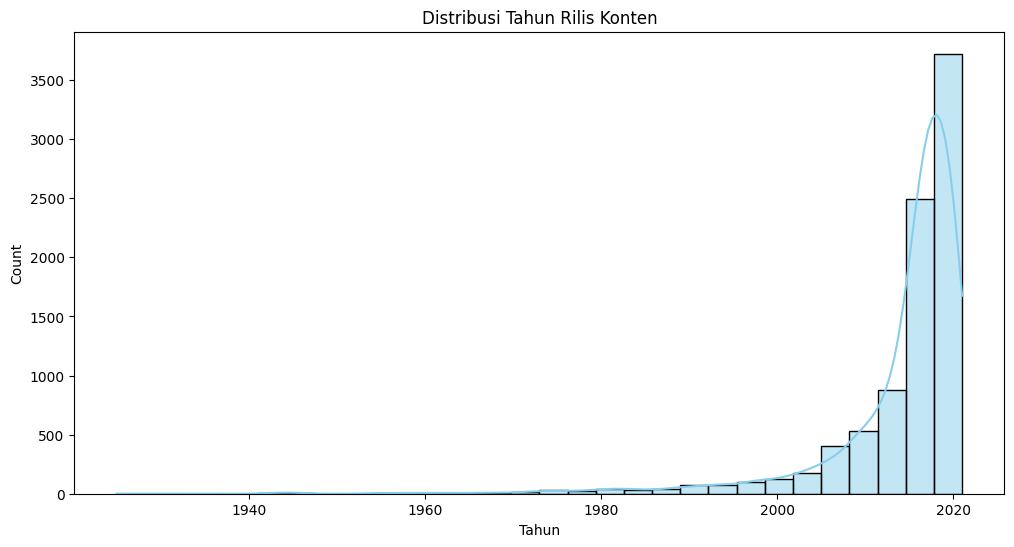

/tmp/ipython-input-9-3409826640.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='flare')


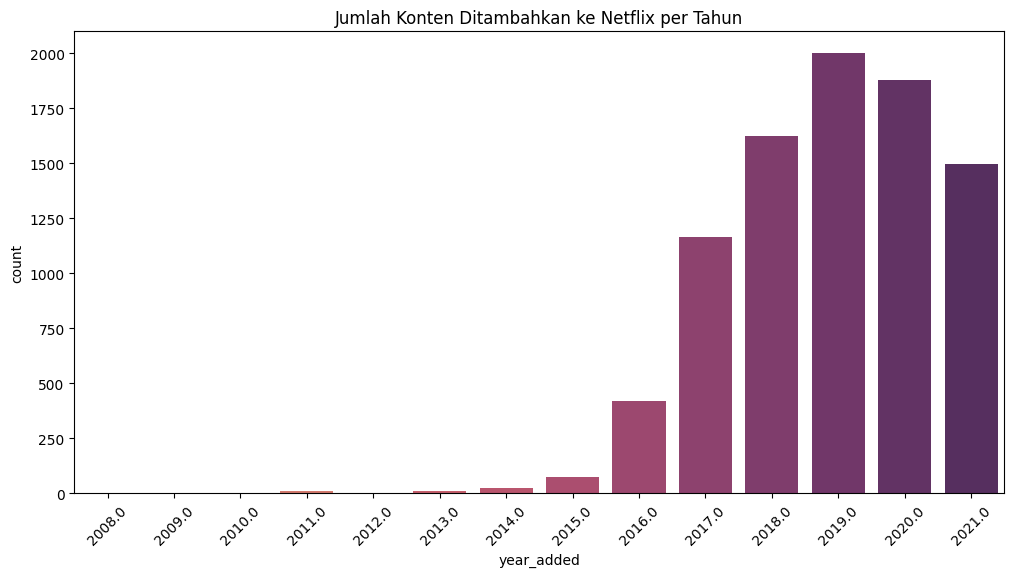

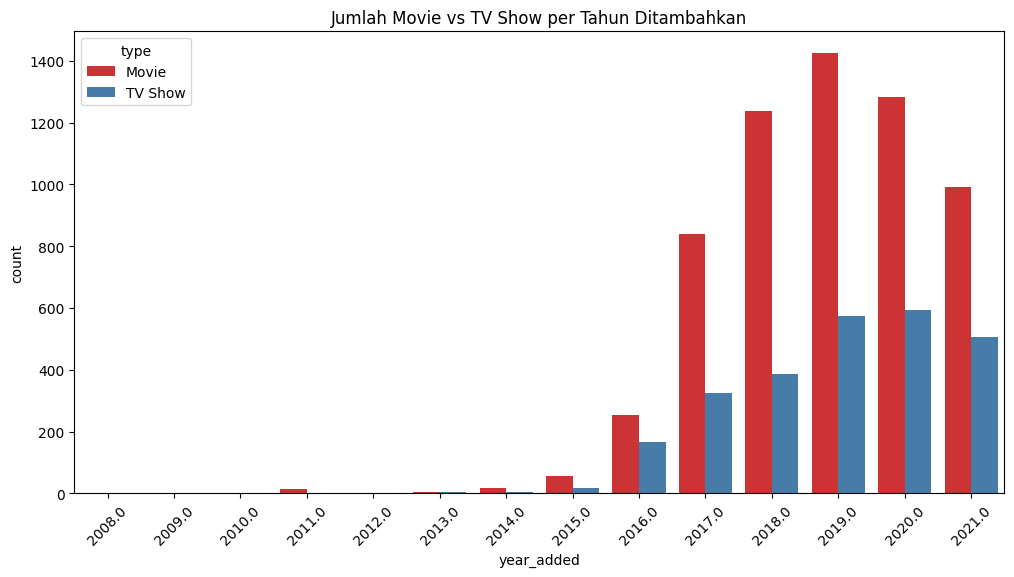

In [9]:
# Distribusi Tahun Rilis
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Tahun Rilis Konten")
plt.xlabel("Tahun")
plt.show()

# Jumlah Konten yang Ditambahkan per Tahun
plt.figure(figsize=(12,6))
sns.countplot(x='year_added', data=df, palette='flare')
plt.title("Jumlah Konten Ditambahkan ke Netflix per Tahun")
plt.xticks(rotation=45)
plt.show()

# Perbandingan Movie vs TV Show per Tahun
plt.figure(figsize=(12,6))
sns.countplot(x='year_added', hue='type', data=df, palette='Set1')
plt.title("Jumlah Movie vs TV Show per Tahun Ditambahkan")
plt.xticks(rotation=45)
plt.show()
